In [3]:
import  numpy as np
from numpy.random import *
import math
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import seaborn as sns
import csv
import pandas as pd

In [4]:
#read_file = pd.read_csv ("dane2.txt")
#read_file.to_csv ("dane2.csv", index=None)

In [5]:
with open('dane1.csv', newline='') as plik1:
    dane1=csv.reader(plik1)
    X=[]
    for i in dane1:
        X.append(float(i[0]))
with open('dane2.csv', newline='') as plik2:
    dane2=csv.reader(plik2)
    Y=[]
    for i in dane2:
        Y.append(float(i[0]))

In [6]:
mean=np.mean(X)
variance= np.std(X)
sigma=np.sqrt(variance)
print(mean)
print(variance)

1.45546595425
0.19897137413206548


In [7]:
def zadanie1(X,sig,H0,alfa):
    t = np.linspace(-8,8, 1000)
    y= [scipy.stats.norm.pdf(i) for i in t]
    sr=np.mean(X)
    n = len(X)
    z=(sr-H0)/(sig/np.sqrt(n))
    print(z)
    p=[sr-sig/np.sqrt(n)*scipy.stats.norm.ppf(1-alfa/2),sr+sig/np.sqrt(n)*scipy.stats.norm.ppf(1-alfa/2)]
    plt.plot(t,y,label="N(0,1)")
    print(f"z(1-a/2)={scipy.stats.norm.ppf(1-alfa/2)}")
    plt.vlines(x=scipy.stats.norm.ppf(1-alfa/2),ymin=0,ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1 - alfa / 2)),color="red")
    plt.vlines(x=-scipy.stats.norm.ppf(1 - alfa / 2), ymin=0, ymax=scipy.stats.norm.pdf(-scipy.stats.norm.ppf(1 - alfa / 2)),color="red")
    plt.fill_between(x=t,y1=y,where=(t<-scipy.stats.norm.ppf(1 - alfa / 2)),color="b",alpha=0.2,label="Obszar krytyczny")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.norm.ppf(1 - alfa / 2)), color="b", alpha=0.2)
    plt.scatter(z,0,color="purple",label='z')
    plt.title("Hipoteza μ!="+str(H0)+"α="+str(alfa))
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()
    plt.plot(t, y,label="N(0,1)")
    print(f"-z(1-a/2){-scipy.stats.norm.ppf(1 - alfa / 2)}")
    plt.vlines(x=scipy.stats.norm.ppf(1-alfa), ymin=0,
               ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1-alfa)), color="red")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.norm.ppf(1-alfa)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(z,0,color="purple",label='z')
    plt.title("Hipoteza μ>"+str(H0)+" α="+str(alfa))
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.legend()
    plt.show()
    plt.plot(t, y,label="N(0,1)")
    print(f"z(1-a){-scipy.stats.norm.ppf(1 - alfa)}")
    plt.vlines(x=-scipy.stats.norm.ppf(1 - alfa), ymin=0,
               ymax=scipy.stats.norm.pdf(scipy.stats.norm.ppf(1 - alfa)), color="red")
    plt.fill_between(x=t, y1=y, where=(t < -scipy.stats.norm.ppf(1 - alfa)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(z,0,color="purple",label='z')
    plt.title("Hipoteza μ<"+str(H0)+"α="+str(alfa))
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.legend()
    plt.show()
    print(z)
    print(2*(1-scipy.stats.norm.cdf(math.fabs(z))))
    print(1-scipy.stats.norm.cdf(z))
    print(scipy.stats.norm.cdf(z))

-3.1571618863135615
z(1-a/2)=1.959963984540054


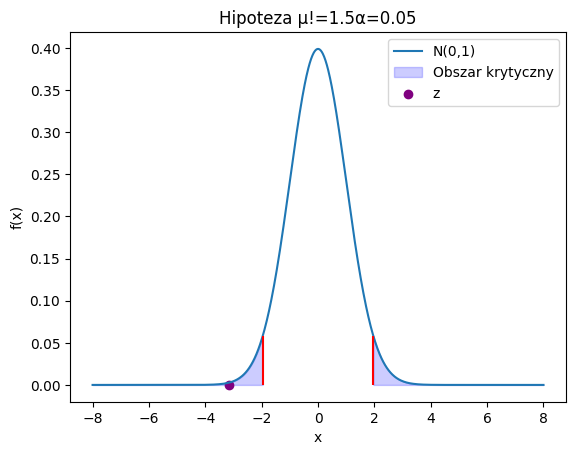

-z(1-a/2)-1.959963984540054


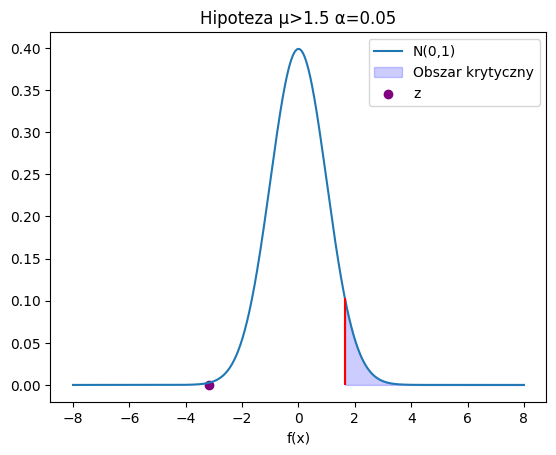

z(1-a)-1.6448536269514722


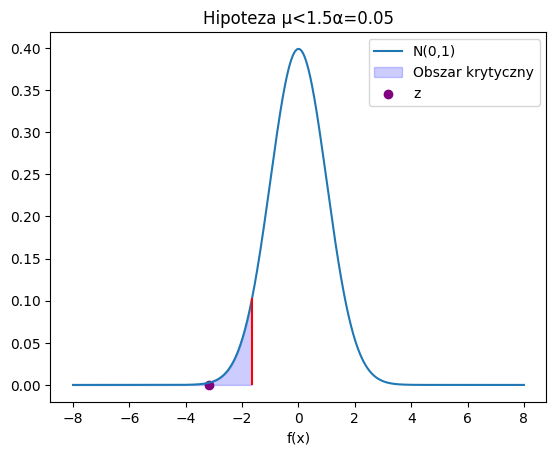

-3.1571618863135615
0.0015931287370636316
0.9992034356314682
0.0007965643685317609


In [8]:
zadanie1(X,sigma,1.5,0.05)

In [9]:
def zadanie2(Y,mi,H0,alfa):
    sr=np.mean(Y)
    var=1/(len(Y)-1)*np.sum([(y-sr)**2 for y in Y])
    n=len(Y)
    chi=(n-1)*var/(H0**2)
    t=np.linspace(700,1300,1000)
    y=[scipy.stats.chi2.pdf(i,n-1) for i in t]
    plt.plot(t,y,label="χ2 z 999 st. swobody")
    print(f"1-alfa/2={scipy.stats.chi2.ppf(1 - alfa / 2,n-1)}")
    print(f"a/2={scipy.stats.chi2.ppf(alfa / 2,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(1 - alfa / 2,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(1 - alfa / 2,n-1),n-1), color="red")
    plt.vlines(x=scipy.stats.chi2.ppf(alfa / 2,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(alfa / 2,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t <= scipy.stats.chi2.ppf(alfa / 2,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.fill_between(x=t, y1=y, where=(t >= scipy.stats.chi2.ppf(1-alfa / 2,n-1)), color="b", alpha=0.2)
    plt.scatter(chi,0,color="purple",label='χ2')
    plt.title("Hipoteza σ!="+str(H0)+" α="+str(alfa))
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.legend()
    plt.show()
    plt.plot(t,y,label="χ2 z 999 st. swobody")
    print(f"1-a={scipy.stats.chi2.ppf(1-alfa,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(1-alfa,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(1-alfa,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t > scipy.stats.chi2.ppf(1-alfa,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(chi,0,color="purple",label='χ2')
    plt.title("Hipoteza σ>"+str(H0)+" α="+str(alfa))
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.legend()
    plt.show()
    plt.plot(t,y,label="χ2 z 999 st. swobody")
    print(f"a={scipy.stats.chi2.ppf(alfa,n-1)}")
    plt.vlines(x=scipy.stats.chi2.ppf(alfa,n-1), ymin=0,
               ymax=scipy.stats.chi2.pdf(scipy.stats.chi2.ppf(alfa,n-1),n-1), color="red")
    plt.fill_between(x=t, y1=y, where=(t < scipy.stats.chi2.ppf(alfa,n-1)), color="b", alpha=0.2,
                     label="Obszar krytyczny")
    plt.scatter(chi,0,color="purple",label='χ2')
    plt.title("Hipoteza σ<"+str(H0)+"α="+str(alfa))
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.legend()
    plt.show()
    print(chi)
    print(2*scipy.stats.chi2.cdf(chi,n-1))
    print(1-scipy.stats.chi2.cdf(chi,n-1))
    print(scipy.stats.chi2.cdf(chi,n-1))

1-alfa/2=1088.4870677259353
a/2=913.3009983021134


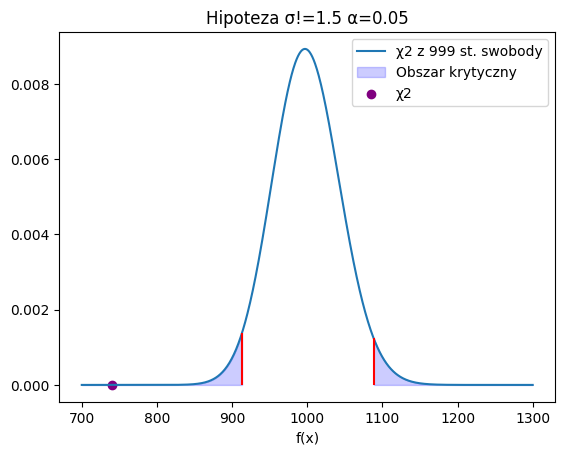

1-a=1073.6426506574246


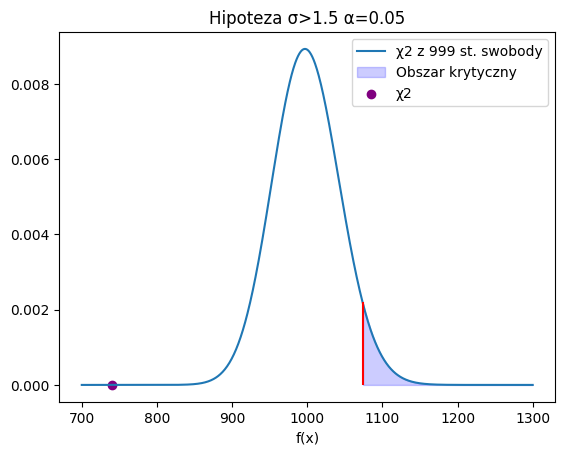

a=926.6311609204329


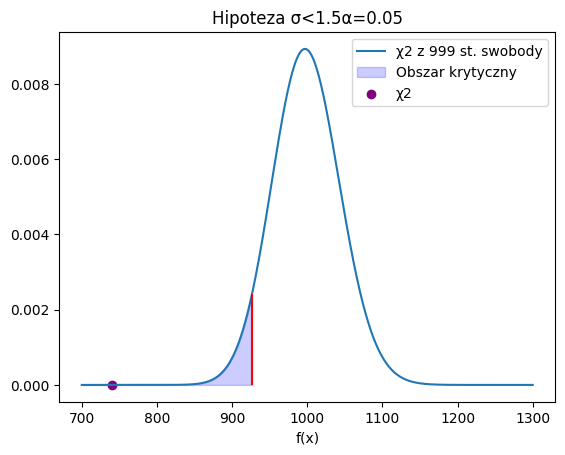

740.6456326010045
2.0857488195520912e-10
0.9999999998957125
1.0428744097760456e-10


In [10]:
zadanie2(Y,0.2,1.5,0.05)